In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.style.use('seaborn-colorblind')
plt.ion()

In [3]:
df = pd.read_csv('datasets/shootings.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


Asian: 36.56167593336281
Black: 32.54994633407771
Hispanic: 33.68384738540233
Native: 31.732281165402185
Other: 33.06495689377855
White: 39.90948777049481
Overall: 36.549749566213784


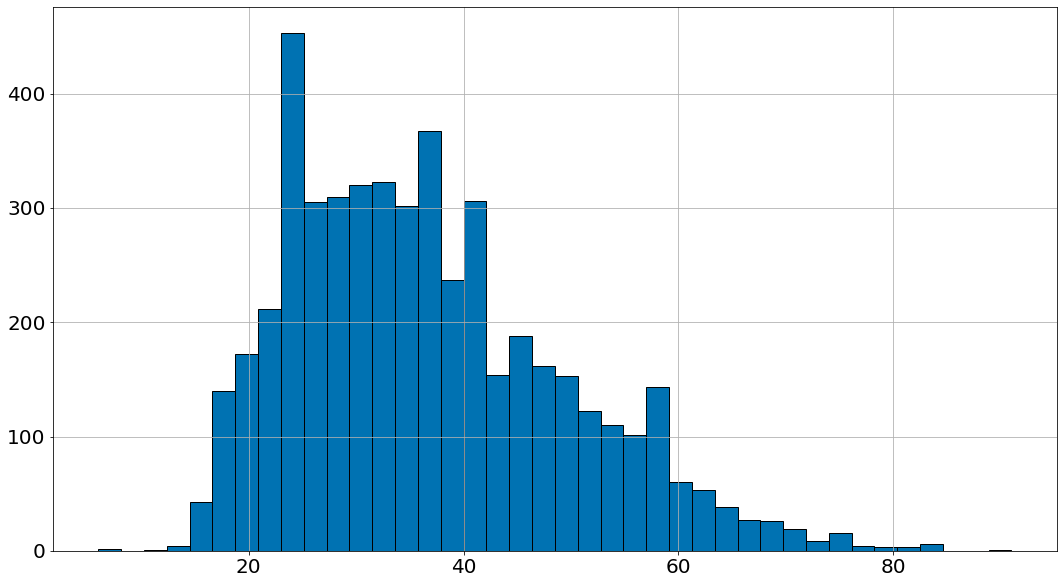

In [4]:
#Número de mortes por idade
age = df['age']
age.hist(edgecolor='k', bins=40).plot()

agePerRace = df.groupby('race')['age'].mean()

i = 0
for item in agePerRace:
    print(agePerRace.index[i] + ": " + str(item))
    i+= 1
    
print("Overall: " + str(df['age'].mean()))

As idades média dos mortos é cerca de 36.5 anos. A grande maioria das mortes é observada entre os 16 e os 60 anos.
Há também certa variação na idade média agrupada por raça: destacam-se os brancos, com uma média de idade de quase 40 anos,
seguidos pelos asiáticos, com 36.5, enquanto os outros grupos estão entre 31 e 33 anos.

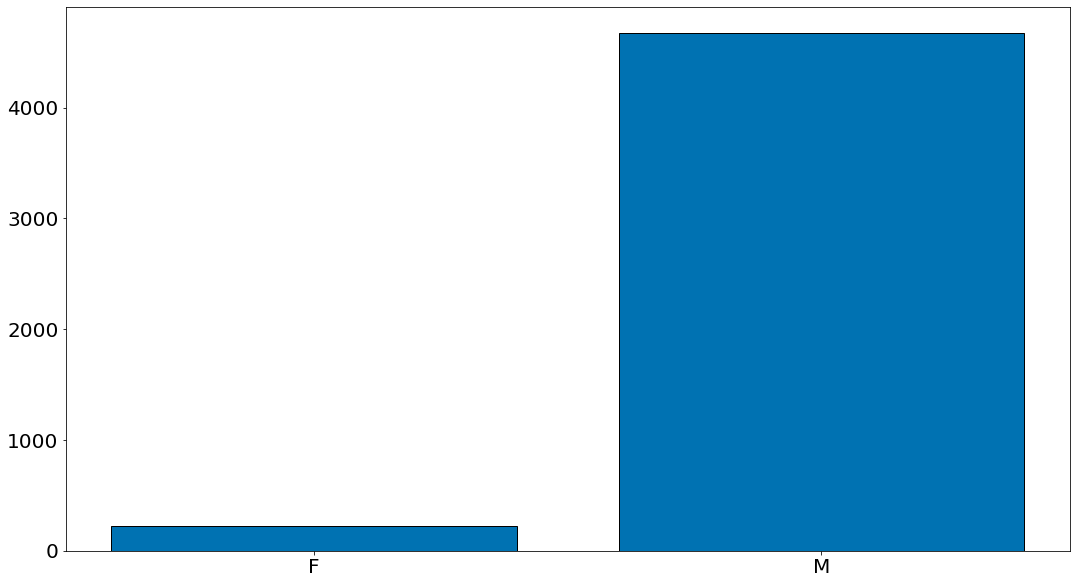

In [5]:
#Número de mortes por gênero
labels, counts = np.unique(df['gender'], return_counts=True)
plt.bar(labels, counts, align='center', edgecolor='k')
plt.gca().set_xticks(labels)
plt.show()

A maioria das pessoas mortas pela polícia americana são homens.

In [6]:
usPop = pd.read_csv('datasets/acs2017_census_tract_data.csv')

usPop['Other'] = round(100 - usPop['Hispanic'] - usPop['White'] - usPop['Black'] - usPop['Native'] - usPop['Asian'], 2)
orderedRace = ['Asian','Black','Hispanic','Native','Other','White']

usRacePop = pd.DataFrame(columns = [])
arrayRacePop = []
mortalityPerMillion = []
usTotalPop = usPop['TotalPop'].sum()

for item in orderedRace:
    usRacePop[item + 'Pop'] = round(usPop[item] * usPop['TotalPop'] / 100)
    arrayRacePop.append(round(usRacePop[item+'Pop'].sum() / usTotalPop, 4))

print(arrayRacePop)
#Obs: podem haver pequenas variações nos dados pelo uso do round nos métodos acima

[0.0524, 0.1216, 0.1847, 0.0065, 0.0268, 0.6081]


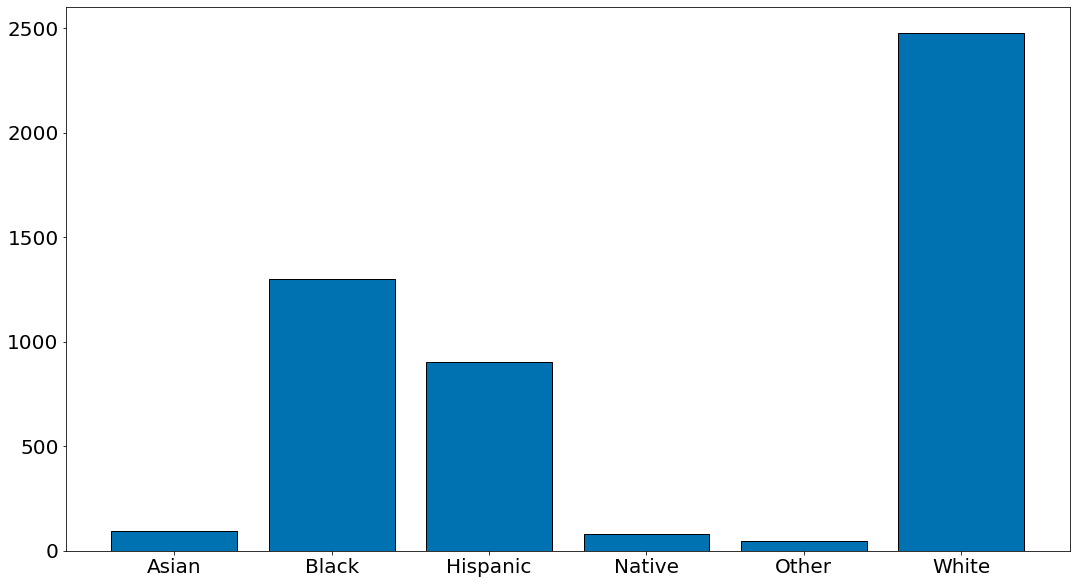

In [7]:
#Número de mortes por raça
labels, counts = np.unique(df['race'], return_counts=True)
plt.bar(labels, counts, align='center', edgecolor='k')
plt.gca().set_xticks(labels)
plt.show()

Em geral, a polícia americana mata mais brancos, seguidos de negros e hispânicos. Agora, podemos comparar esses números com o tamanho de cada população nos Estados Unidos. 

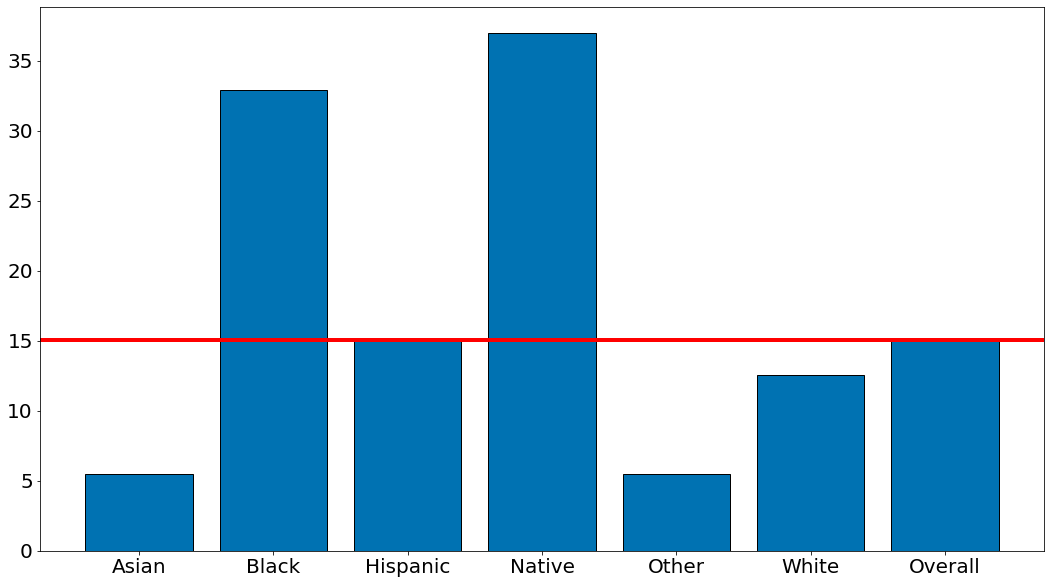

In [8]:
#Taxa de mortes por raça, por milhão de habitantes

labels, counts = np.unique(df['race'], return_counts=True)

Overall = counts.sum() / (usTotalPop / 1000000)   

newCount = np.zeros(len(counts))
for i in range(len(counts)):
    newCount[i] = counts[i] / ((usTotalPop) * (arrayRacePop[i]) / 1000000.0)

labels = np.append(labels, 'Overall')
newCount = np.append(newCount, Overall)
    
plt.bar(labels, newCount, align='center', edgecolor='k')
plt.gca().set_xticks(labels)
plt.axhline(y = Overall, color='r')
plt.show()

Quando ajustamos as mortes pela população, vemos que a taxa de mortalidade para negros e nativos são mais do que o dobro da taxa média da população, seguidos por hispânicos e depois brancos, que estão um pouco abaixo da média.
Um dos fatores que explicam a alta taxa dos nativos é a sua pequena população, isto é, poucas mortes podem aumentar significativamente essa taxa.

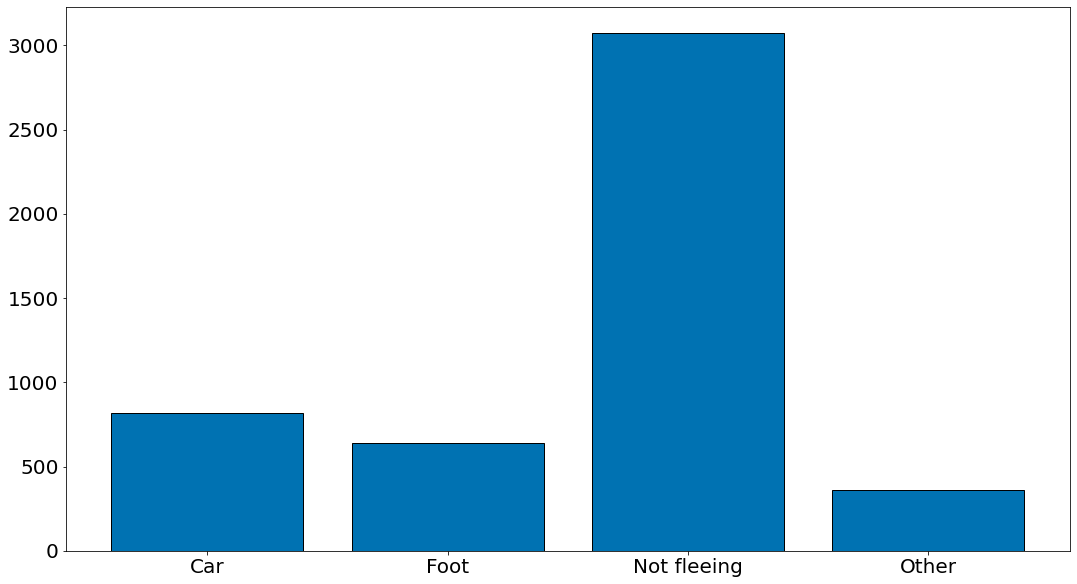

In [20]:
labels, counts = np.unique(df['flee'], return_counts=True)

plt.bar(labels, counts, align='center', edgecolor='k')
plt.gca().set_xticks(labels)
plt.show()


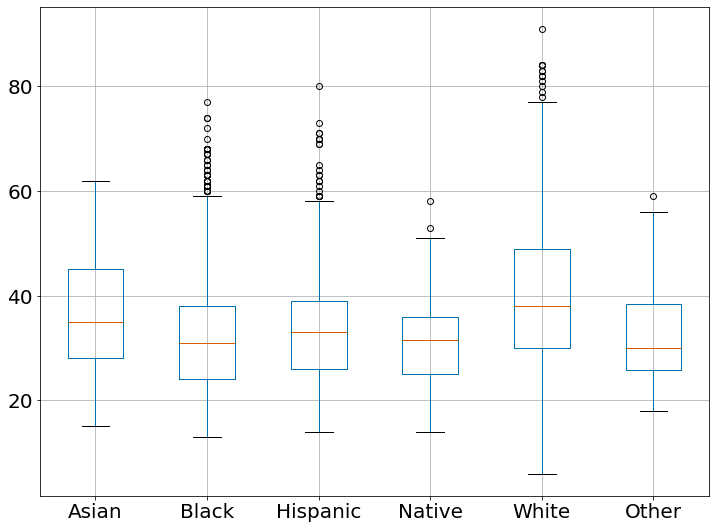

In [10]:
df_boxplot = df.pivot(columns='race', values='age')
boxplot = df_boxplot.boxplot(column=['Asian', 'Black', 'Hispanic', 'Native', 'White', 'Other'], figsize = (12,9))

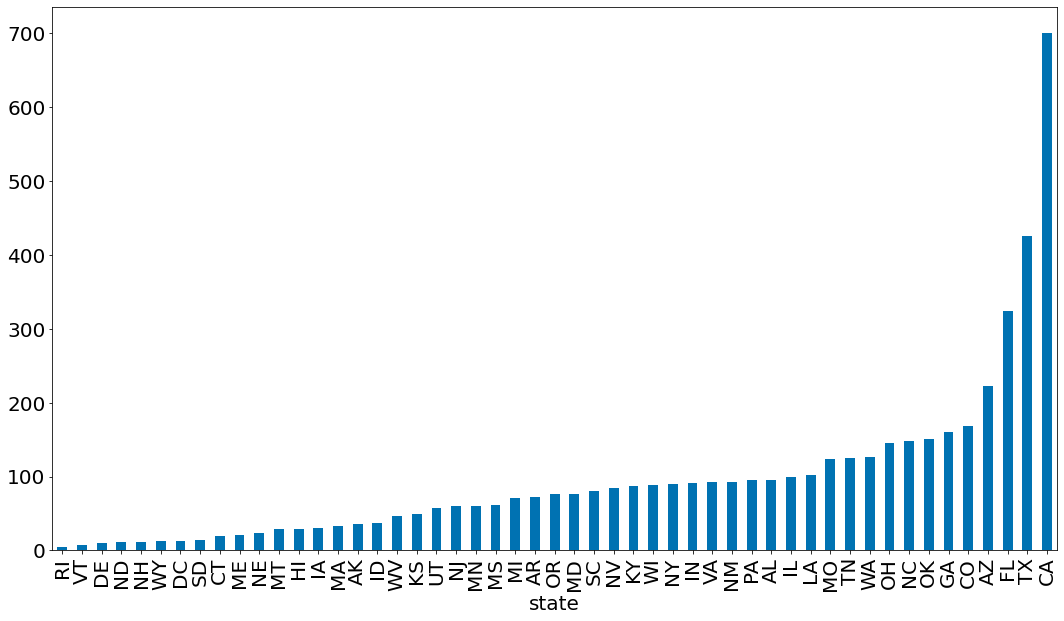

In [22]:
df_death_per_state = df.groupby(['state']).size().sort_values()
df_death_per_state.plot(kind = 'bar')